# Corner Detection

## Quantities to be evaluated over a window.

The function E(u,v) is minimum when the displacement is zero. Function is non zero for any ohter displacement.

### $E(u,v) = \Sigma{(I(x+u, y+v)-I(x,y))}^{2}$
### $E(u,v) = \Sigma{(I_{x}.u+I_{y}.v)^{2}}$
### $E(u,v) = \Sigma{(I_{x}^{2}.u^{2}+2.I_{x}.I_{y}.u.v + I_{y}^{2}.v^{2})}$

In [84]:
%matplotlib inline
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [159]:
img0 = cv.imread('building.jpg', cv.IMREAD_GRAYSCALE)
img = cv.GaussianBlur(img0, (3, 3), 0)

#Gradient calculation using sobel or more accurate Scharr function 
I_x = cv.Scharr(img,cv.CV_64F,1,0)
I_y = cv.Scharr(img,cv.CV_64F,0,1)

#Taking sigma equals to convolve with a filter of ones
windim = 3
window = np.ones((windim,windim))

#Calculating second moment matrix's components over window for each pixel
sigma_I_x2 = cv.filter2D(I_x*I_x,-1,window)
sigma_I_y2 = cv.filter2D(I_y*I_y,-1,window)
sigma_I_xI_y = cv.filter2D(I_x*I_y,-1,window)

# Computing eigen values is expensive. Therefore calculate corner response function

## $R = det(M) - alpha* trace(M)^2$
### $det(M) = \Sigma(I_{x}^{2}).\Sigma(I_{y}^{2}) - (\Sigma(I_{x}.I_{y}))^{2} $   
### $trace(M) = \Sigma(I_{x}^{2})+ \Sigma(I_{y}^{2})$
## alpha = [0.04,0.06]

In [162]:
det_M = sigma_I_x2*sigma_I_y2 - sigma_I_xI_y**2
trace_M = sigma_I_x2 + sigma_I_y2
alpha = 0.05
CornerResponse = det_M - alpha*trace_M

#CornerResponse = (CornerResponse/np.max(CornerResponse))*((np.max(CornerResponse)+ np.min(CornerResponse))/2)
# Thresholding 

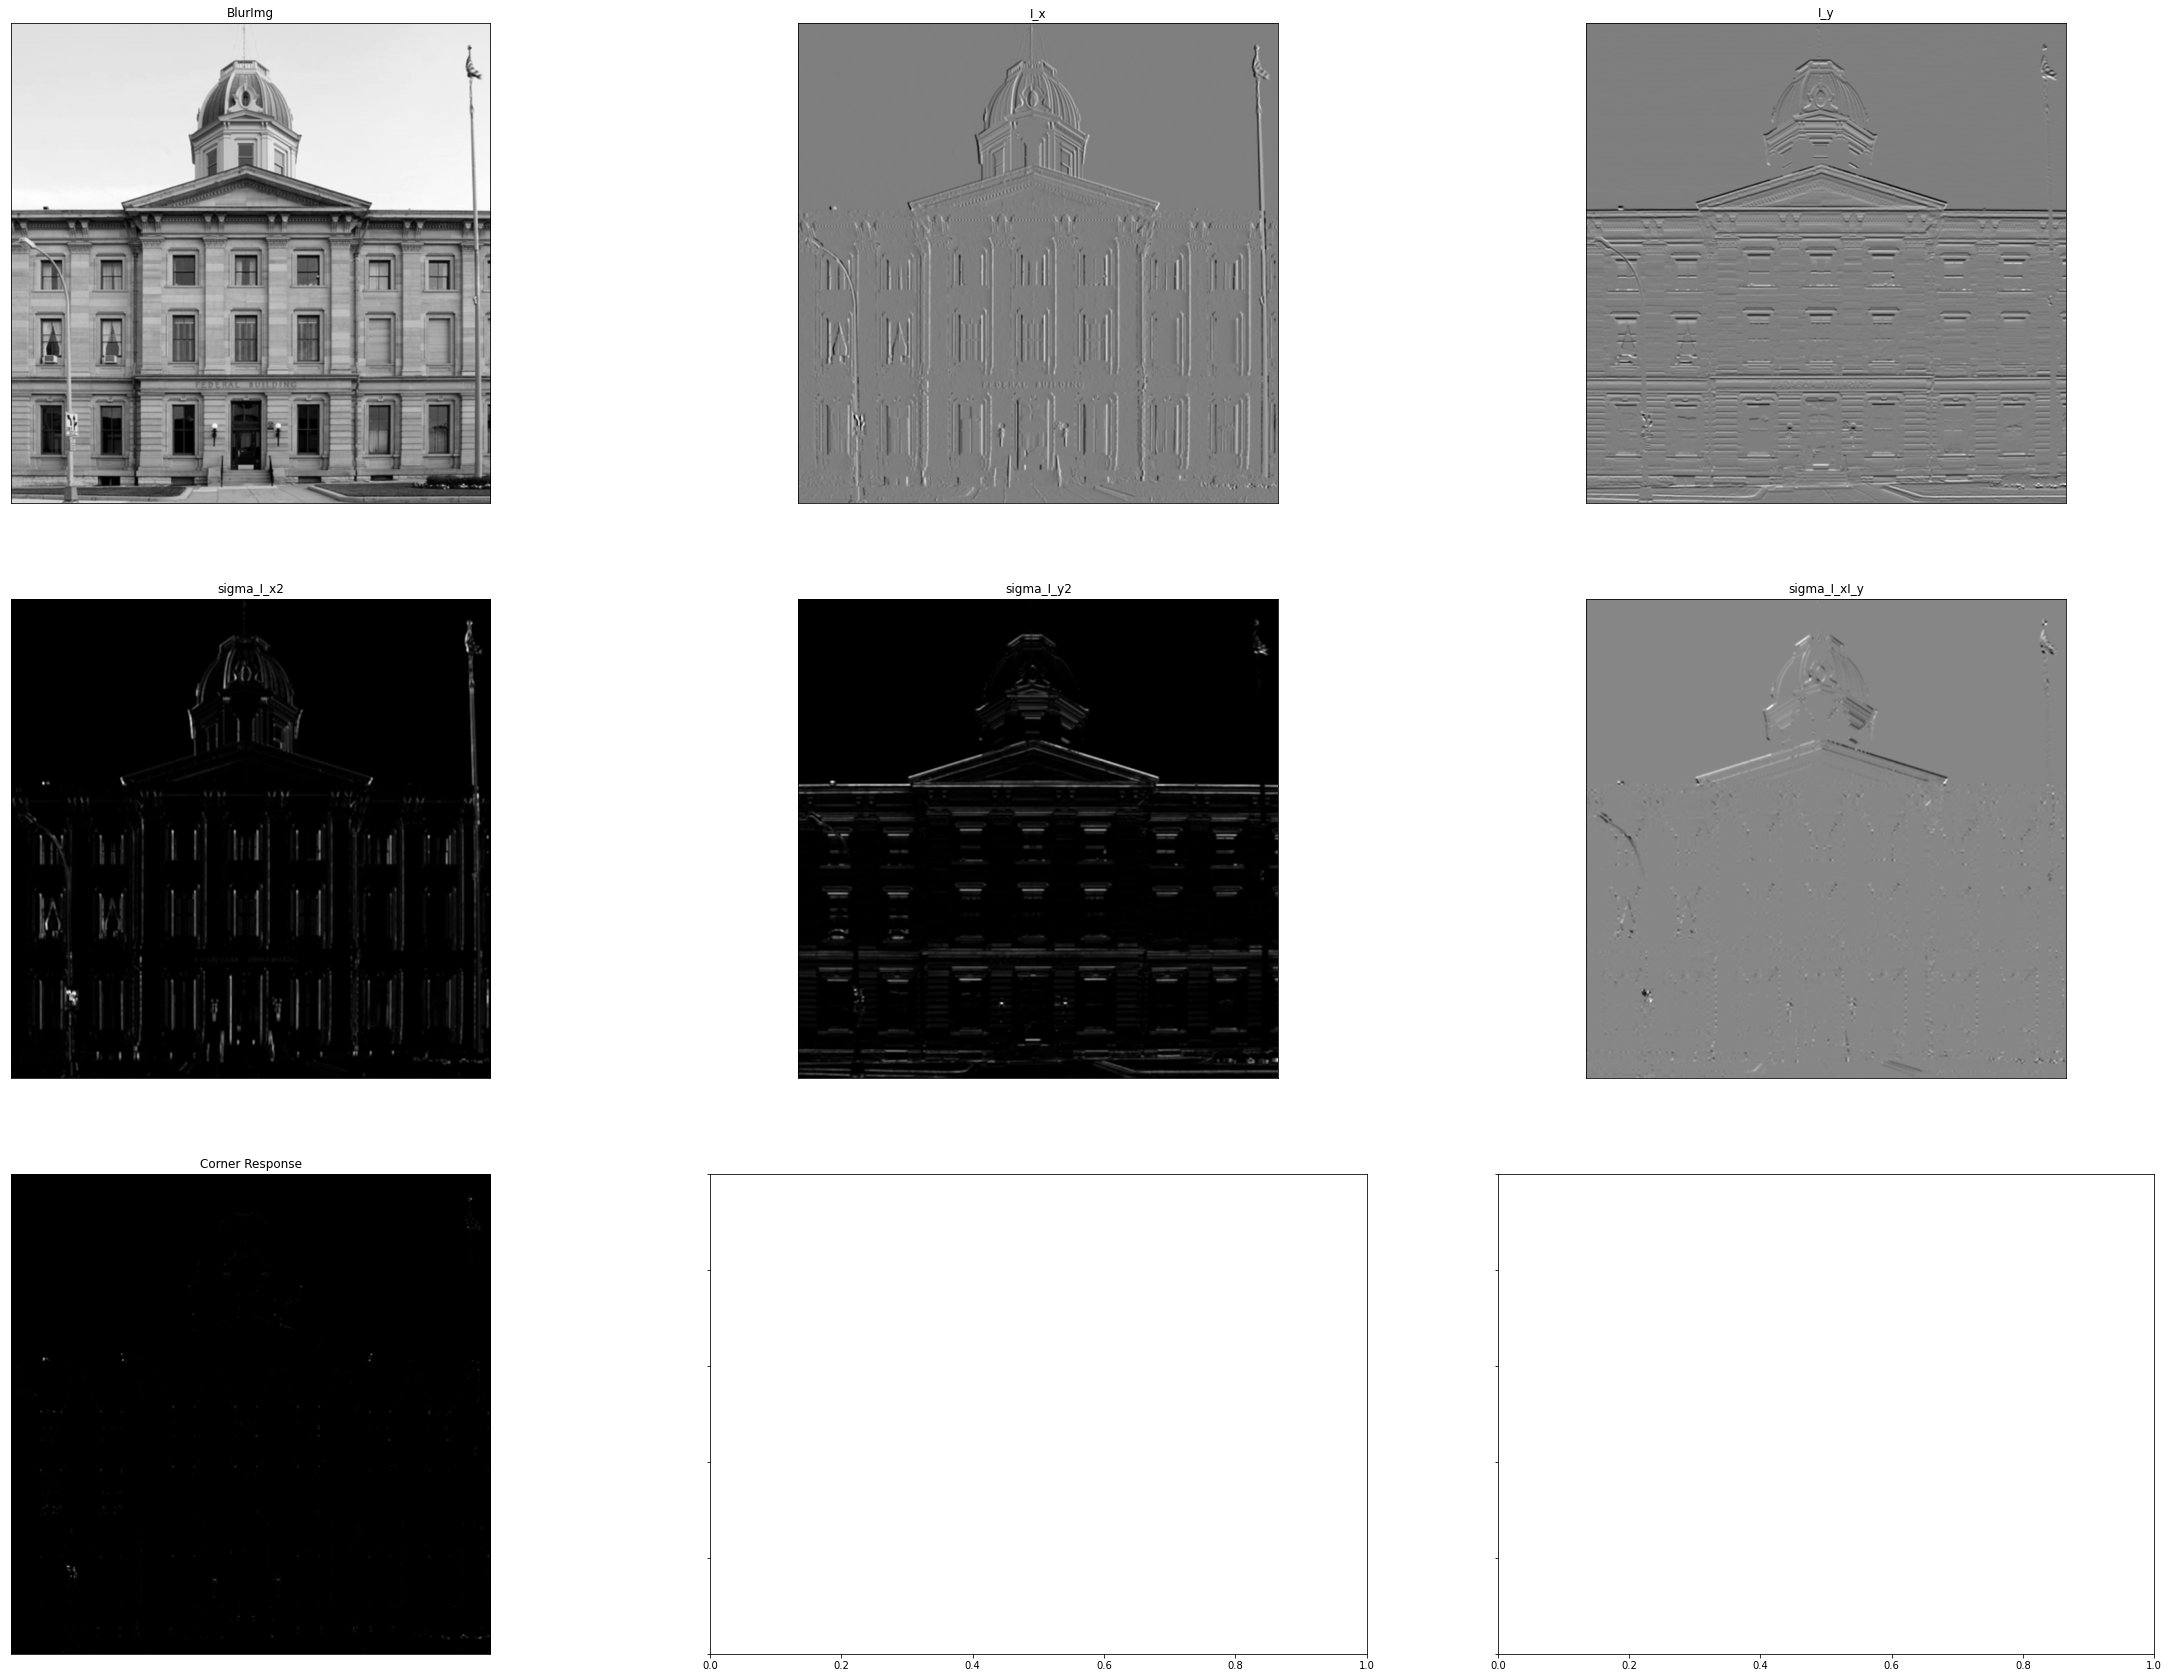

In [163]:
# Plotting
fig, axes  = plt.subplots(3,3, sharex='all', sharey='all', figsize=(40,30))
img_dict = {'BlurImg':img, 'I_x':I_x, 'I_y':I_y,
            'sigma_I_x2':sigma_I_x2, 'sigma_I_y2':sigma_I_y2,'sigma_I_xI_y':sigma_I_xI_y,
            'Corner Response':CornerResponse}
i =0
for key in img_dict.keys():
    plt.subplot(3,3,i+1),plt.imshow(img_dict[key], cmap='gray')#, vmin = 0, vmax = 255)
    plt.title(key),plt.xticks([]),plt.yticks([])
    i+=1
plt.show()